In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from keras.applications import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
y_train = []
image_size = 150

In [5]:
train_path = '/content/drive/MyDrive/BRAIN TUMOR MAIN/Training'
labels = os.listdir(train_path)
print(labels)

['pituitary_tumor', 'no_tumor', 'meningioma_tumor', 'glioma_tumor']


In [6]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(i)

In [7]:
test_path = '/content/drive/MyDrive/BRAIN TUMOR MAIN/Training'


In [8]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))

In [9]:
X_train.append(img)
y_train.append(i)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [3, 3, 3],
        [1, 1, 1]],

       [[1, 1, 1],
        [3, 3, 3],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [4, 4, 4],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
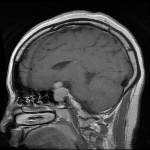

In [10]:
X_train[1]

In [11]:
y_train[1]

'pituitary_tumor'

In [12]:
# X_train.shape, y_train.shape
len(X_train), len(y_train)


(5395, 5395)

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)


In [14]:
X_train.shape, y_train.shape

((5395, 150, 150, 3), (5395,))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [3, 3, 3],
        [1, 1, 1]],

       [[1, 1, 1],
        [3, 3, 3],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [4, 4, 4],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
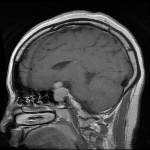

In [15]:
X_train[1]

In [16]:
y_train[1]

'pituitary_tumor'

In [17]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((5395, 150, 150, 3), (5395,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)


In [19]:
y_train[:5]

array(['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor',
       'meningioma_tumor', 'glioma_tumor'], dtype='<U16')

In [20]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train_new[:5]

[2, 0, 3, 2, 3]

In [21]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [22]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [23]:
model = Sequential()

In [24]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [25]:
for layer in vgg.layers:
    layer.trainable = False

In [26]:
model.add(vgg)

In [27]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2

In [29]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
hist = model.fit(X_train, y_train_new, epochs = 10, validation_split = 0.1)

Epoch 1/10
137/137 [==============================] - 1148s 8s/step - loss: 8.2988 - accuracy: 0.6638 - val_loss: 0.9537 - val_accuracy: 0.8148
Epoch 2/10
137/137 [==============================] - 1141s 8s/step - loss: 1.7658 - accuracy: 0.7913 - val_loss: 0.5594 - val_accuracy: 0.8457
Epoch 3/10
137/137 [==============================] - 1141s 8s/step - loss: 1.0223 - accuracy: 0.8249 - val_loss: 0.4267 - val_accuracy: 0.8889
Epoch 4/10
137/137 [==============================] - 1141s 8s/step - loss: 0.6976 - accuracy: 0.8508 - val_loss: 0.2785 - val_accuracy: 0.9074
Epoch 5/10
137/137 [==============================] - 1142s 8s/step - loss: 0.5253 - accuracy: 0.8727 - val_loss: 0.3220 - val_accuracy: 0.8951
Epoch 6/10
137/137 [==============================] - 1109s 8s/step - loss: 0.4034 - accuracy: 0.9007 - val_loss: 0.2457 - val_accuracy: 0.9033
Epoch 7/10
137/137 [==============================] - 1142s 8s/step - loss: 0.4518 - accuracy: 0.8963 - val_loss: 0.2357 - val_accuracy:

In [ ]:
model.save("Brain_Tumor_Image_Classification_Model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

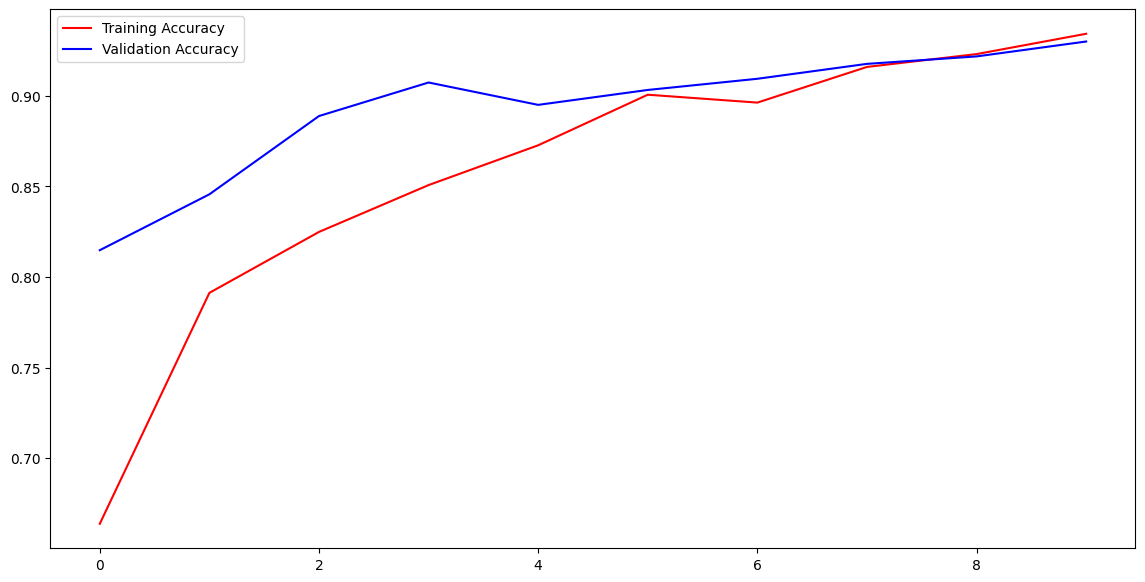

In [ ]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

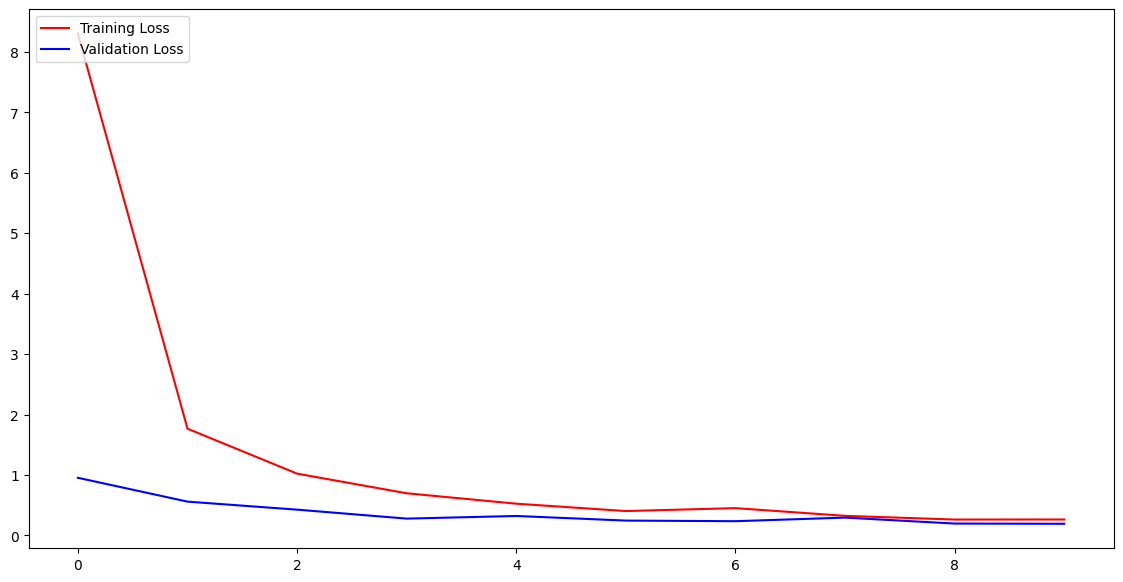

In [ ]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
img_path = '/content/drive/MyDrive/Brain_tumor4/Testing/meningioma/Te-meTr_0001.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array.shape

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
print(a)

In [ ]:
indices = a.argmax()
indices

In [ ]:
labels[indices]

In [ ]:
img_path = '/content/drive/MyDrive/Brain_tumor4/Testing/pituitary/Te-piTr_0003.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array.shape

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
print(a)

In [ ]:
indices = a.argmax()
indices

In [ ]:
labels[indices]